In [41]:
import pandas as pd

df=pd.read_csv("All_Songs_Dataset.csv")
df['label'] = df['label'].str.replace('<pad>', '')
df.head(1)

,folder,label,tempo,zcr,beats,spec_centroid,rms_mode,rms_max,rms_avg,mfcc0,...,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,chr11
0,21 Savage - Bank Account,anger,151.999081,0.053069,543,1702.096851,0.1,0.6,0.262555,-149.79782,...,0.617154,0.552915,0.566778,0.561692,0.565644,0.539272,0.671689,0.577762,0.546254,0.576253


### Label Encoding

In [43]:

df['label'] = df['label'].str.replace(' fear', ' love')
df['label'] = df['label'].str.replace(' surprise', ' love')

print(df['label'].unique())


[' anger' ' sadness' ' love' ' joy']


In [50]:
import numpy as np
x1=df.loc[0].drop(['folder','emotion'])
x1 = scaler.fit_transform(np.array(x1).reshape(-1,1))

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
label_encoder = LabelEncoder()
df['emotion'] = label_encoder.fit_transform(df['label'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("\nLabel Mapping:")
print(label_mapping)


Label Mapping:
{' anger': 0, ' joy': 1, ' love': 2, ' sadness': 3}


In [46]:
emotion_counts = df['emotion'].value_counts()

# Display the counts
print(emotion_counts)

emotion
1    197
3    147
0     54
2     46
Name: count, dtype: int64


In [49]:
df=df.drop(columns='label')
df.head(1)

,folder,tempo,zcr,beats,spec_centroid,rms_mode,rms_max,rms_avg,mfcc0,mfcc1,...,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,chr11,emotion
0,21 Savage - Bank Account,151.999081,0.053069,543,1702.096851,0.1,0.6,0.262555,-149.79782,116.79124,...,0.552915,0.566778,0.561692,0.565644,0.539272,0.671689,0.577762,0.546254,0.576253,0


### Machine Learning

In [51]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay



In [52]:
df.to_csv("Labeled Emotions",index=False)

In [53]:
X=df.drop(columns="folder")
X=X.iloc[:,:-1]
y=df.iloc[:,-1]

####  Step 1: Normalising the data

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 2: Models

Accuracy: 0.47
Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.12      0.12         8
           1       0.56      0.72      0.63        39
           2       0.00      0.00      0.00         8
           3       0.46      0.38      0.42        34

    accuracy                           0.47        89
   macro avg       0.28      0.31      0.29        89
weighted avg       0.43      0.47      0.45        89



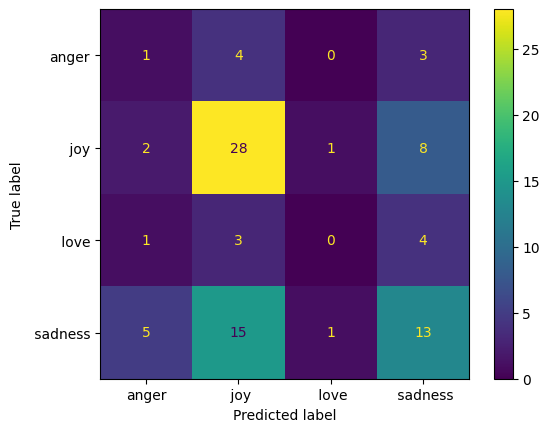

In [56]:

svm_classifier = OneVsRestClassifier(SVC(kernel='linear', C=1.0))

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['anger', ' joy',' love', ' sadness'])
disp.plot()


In [62]:
x1=x1.reshape(1,39)

In [63]:
svm_classifier.predict(x1)

array([3])

Random Forest Accuracy: 0.53
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.12      0.18         8
           1       0.53      0.72      0.61        39
           2       0.00      0.00      0.00         8
           3       0.55      0.53      0.54        34

    accuracy                           0.53        89
   macro avg       0.35      0.34      0.33        89
weighted avg       0.47      0.53      0.49        89



c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


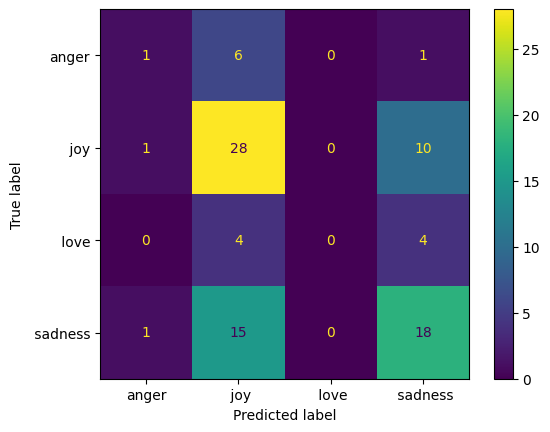

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are your features and labels

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
classification_rep = classification_report(y_test, y_pred_rf)

print("Classification Report:\n", classification_rep)
cm = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['anger', ' joy',' love', ' sadness'])
disp.plot()

In [65]:
df.loc[idx, [f"mfcc_{i}" for i in range(10)]] = range(10)
df.loc[idx, spect] = 

NameError: name 'idx' is not defined

SVM Accuracy: 0.44
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.44      1.00      0.61        39
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        34

    accuracy                           0.44        89
   macro avg       0.11      0.25      0.15        89
weighted avg       0.19      0.44      0.27        89



c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


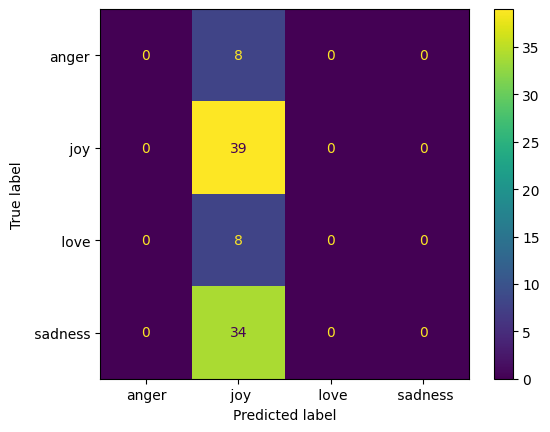

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are your features and labels

# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='poly', C=0.5, random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')

classification_rep = classification_report(y_test, y_pred_svm)

print("Classification Report:\n", classification_rep)
cm = confusion_matrix(y_test, y_pred_svm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['anger', ' joy',' love', ' sadness'])
disp.plot()

Neural Network Accuracy: 0.43
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.44      0.95      0.60        39
           2       0.00      0.00      0.00         8
           3       0.25      0.03      0.05        34

    accuracy                           0.43        89
   macro avg       0.17      0.24      0.16        89
weighted avg       0.29      0.43      0.28        89



c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


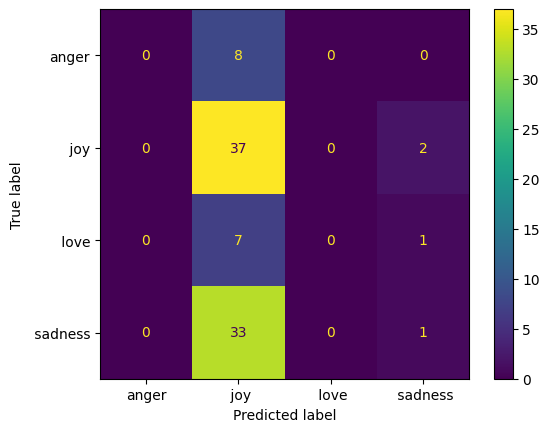

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are your features and labels

# Neural Network
nn_classifier = MLPClassifier(hidden_layer_sizes=(1200,), max_iter=500, random_state=42)
nn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nn = nn_classifier.predict(X_test)

# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f'Neural Network Accuracy: {accuracy_nn:.2f}')
classification_rep = classification_report(y_test, y_pred_nn)

print("Classification Report:\n", classification_rep)
cm = confusion_matrix(y_test, y_pred_nn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['anger', ' joy',' love', ' sadness'])
disp.plot()



XGBoost Accuracy: 0.51
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.56      0.69      0.62        39
           2       0.00      0.00      0.00         8
           3       0.51      0.53      0.52        34

    accuracy                           0.51        89
   macro avg       0.27      0.31      0.29        89
weighted avg       0.44      0.51      0.47        89



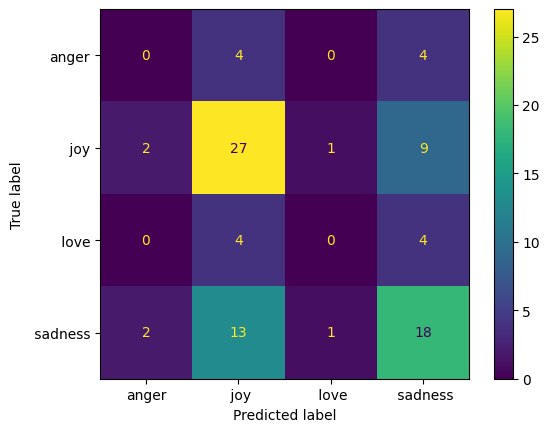

In [16]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are your features and labels

# Gradient Boosting (XGBoost)
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')

classification_rep = classification_report(y_test, y_pred_xgb)

print("Classification Report:\n", classification_rep)
cm = confusion_matrix(y_test, y_pred_xgb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['anger', ' joy',' love', ' sadness'])
disp.plot()

KNN Accuracy: 0.45
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.45      0.74      0.56        39
           2       0.00      0.00      0.00         8
           3       0.44      0.32      0.37        34

    accuracy                           0.45        89
   macro avg       0.22      0.27      0.23        89
weighted avg       0.37      0.45      0.39        89



c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


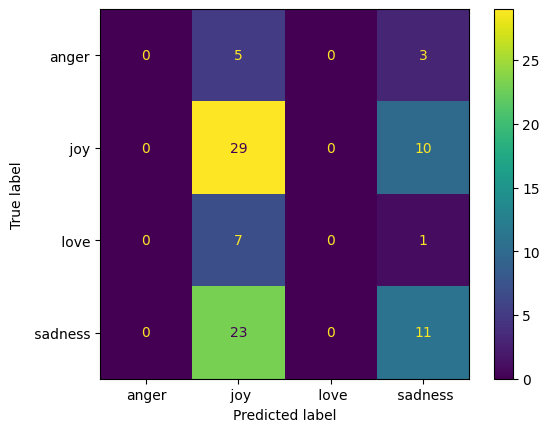

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are your features and labels

# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=29,p=2,weights='distance')
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.2f}')

classification_rep = classification_report(y_test, y_pred_knn)

print("Classification Report:\n", classification_rep)
cm = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['anger', ' joy',' love', ' sadness'])
disp.plot()

In [ ]:
#from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# # Define the parameter distribution
# param_dist = {
#     'n_estimators': randint(100, 300),
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': randint(2, 11),
#     'min_samples_leaf': randint(1, 5)
# }

# # Create a base model
# rf = RandomForestClassifier(random_state=42)

# # Instantiate the random search model
# random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
#                                    n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1, scoring='accuracy')

# # Fit the random search to the data
# random_search.fit(X_train, y_train)

# # Best parameters
# best_params_random = random_search.best_params_
# print("Best Parameters:", best_params_random)

# # Train model with best parameters
# best_rf_random = RandomForestClassifier(**best_params_random, random_state=42)
# best_rf_random.fit(X_train, y_train)

# # Make predictions with the best model
# y_pred_best_rf_random = best_rf_random.predict(X_test)

# # Evaluate the best model
# accuracy_best_rf_random = accuracy_score(y_test, y_pred_best_rf_random)
# print(f'Best Random Forest Accuracy with Random Search: {accuracy_best_rf_random:.2f}')

In [ ]:
# best_rf_classifier = RandomForestClassifier(**best_params_random)
# best_rf_classifier.fit(X_train, y_train)

# y_pred = best_rf_classifier.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Test Accuracy with Best Params: ", accuracy)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [10,14,16,20],  # You can adjust these values based on your problem
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Predict on the test set with the best model
y_pred = grid_search.predict(X_test)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", accuracy)


c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sanjana\

Best Parameters:  {'n_neighbors': 20, 'p': 2, 'weights': 'distance'}
Best Accuracy:  0.447887323943662
Test Accuracy:  0.43820224719101125


c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sanjana\.conda\envs\work_env\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sanjana\